# Google AI Studio

- https://ai.google.dev/docs/gemini_api_overview
- https://aistudio.google.com/app/apikey
- https://ai.google.dev/available_regions

# connect to US

In [25]:
# pip install --upgrade google-cloud-aiplatform
# gcloud auth application-default login

In [ ]:
# !pip install -q -U google-generativeai

In [30]:
 #!curl ipinfo.io

In [1]:
import textwrap
import google.generativeai as genai
from IPython.display import Markdown
import PIL.Image
import urllib.request

In [2]:
from dotenv import dotenv_values

config = dotenv_values(".env")

In [3]:
genai.configure(api_key=config.get("GEMINI-API-KEY"))

In [5]:
import pprint
for model in genai.list_models():
    pprint.pprint(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [6]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [7]:
model = genai.GenerativeModel("gemini-1.0-pro")

In [8]:
def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [9]:
response = model.generate_content(
    "Write a code for different image processing techniques in Python programming language. use only the library Pillow"
    " I would be running the code in a Jupyter Notebook", stream=True
)
response.resolve()

In [10]:
to_markdown(response.text)

> ```python
> # Import the Pillow library
> from PIL import Image, ImageFilter, ImageEnhance
> 
> # Open an image
> image = Image.open("image.jpg")
> 
> # Convert the image to grayscale
> grayscale_image = image.convert("L")
> 
> # Apply a blur filter to the image
> blurred_image = grayscale_image.filter(ImageFilter.GaussianBlur(10))
> 
> # Sharpen the image
> sharpened_image = blurred_image.filter(ImageFilter.SHARPEN)
> 
> # Adjust the brightness of the image
> brightened_image = sharpened_image.point(lambda p: p * 1.5)
> 
> # Adjust the contrast of the image
> contrasted_image = brightened_image.point(lambda p: p * 1.5)
> 
> # Save the processed images
> grayscale_image.save("grayscale_image.jpg")
> blurred_image.save("blurred_image.jpg")
> sharpened_image.save("sharpened_image.jpg")
> brightened_image.save("brightened_image.jpg")
> contrasted_image.save("contrasted_image.jpg")
> 
> # Display the processed images
> Image.display(grayscale_image)
> Image.display(blurred_image)
> Image.display(sharpened_image)
> Image.display(brightened_image)
> Image.display(contrasted_image)
> ```
> 
> This code demonstrates various image processing techniques using the Pillow library in Python. Here's what each part of the code does:
> 
> 1. **Import the Pillow Library:**
>    ```python
>    from PIL import Image, ImageFilter, ImageEnhance
>    ```
>    This line imports the necessary modules from the Pillow library.
> 
> 2. **Open an Image:**
>    ```python
>    image = Image.open("image.jpg")
>    ```
>    This line opens an image file named "image.jpg" and stores it in the `image` variable.
> 
> 3. **Convert the Image to Grayscale:**
>    ```python
>    grayscale_image = image.convert("L")
>    ```
>    This line converts the original image to grayscale using the `convert()` method and stores the result in the `grayscale_image` variable.
> 
> 4. **Apply a Blur Filter:**
>    ```python
>    blurred_image = grayscale_image.filter(ImageFilter.GaussianBlur(10))
>    ```
>    This line applies a Gaussian blur filter to the grayscale image using the `filter()` method. The `GaussianBlur(10)` argument specifies a blur radius of 10 pixels. The result is stored in the `blurred_image` variable.
> 
> 5. **Sharpen the Image:**
>    ```python
>    sharpened_image = blurred_image.filter(ImageFilter.SHARPEN)
>    ```
>    This line sharpens the blurred image using the `SHARPEN` filter from the `ImageFilter` module. The result is stored in the `sharpened_image` variable.
> 
> 6. **Adjust the Brightness:**
>    ```python
>    brightened_image = sharpened_image.point(lambda p: p * 1.5)
>    ```
>    This line increases the brightness of the sharpened image by multiplying each pixel value by 1.5 using the `point()` method. The result is stored in the `brightened_image` variable.
> 
> 7. **Adjust the Contrast:**
>    ```python
>    contrasted_image = brightened_image.point(lambda p: p * 1.5)
>    ```
>    Similarly, this line increases the contrast of the brightened image by multiplying each pixel value by 1.5 using the `point()` method. The result is stored in the `contrasted_image` variable.
> 
> 8. **Save the Processed Images:**
>    ```python
>    grayscale_image.save("grayscale_image.jpg")
>    blurred_image.save("blurred_image.jpg")
>    sharpened_image.save("sharpened_image.jpg")
>    brightened_image.save("brightened_image.jpg")
>    contrasted_image.save("contrasted_image.jpg")
>    ```
>    These lines save the processed images to files with different names, allowing you to compare the original and modified versions.
> 
> 9. **Display the Processed Images:**
>    ```python
>    Image.display(grayscale_image)
>    Image.display(blurred_image)
>    Image.display(sharpened_image)
>    Image.display(brightened_image)
>    Image.display(contrasted_image)
>    ```
>    These lines display the processed images using the `Image.display()` method. You can replace this section with a custom function or code to integrate the image processing into your specific application.
> 
> By running this code in a Jupyter Notebook, you can experiment with different image processing techniques and visualize the results interactively.

In [11]:
from IPython.display import Image

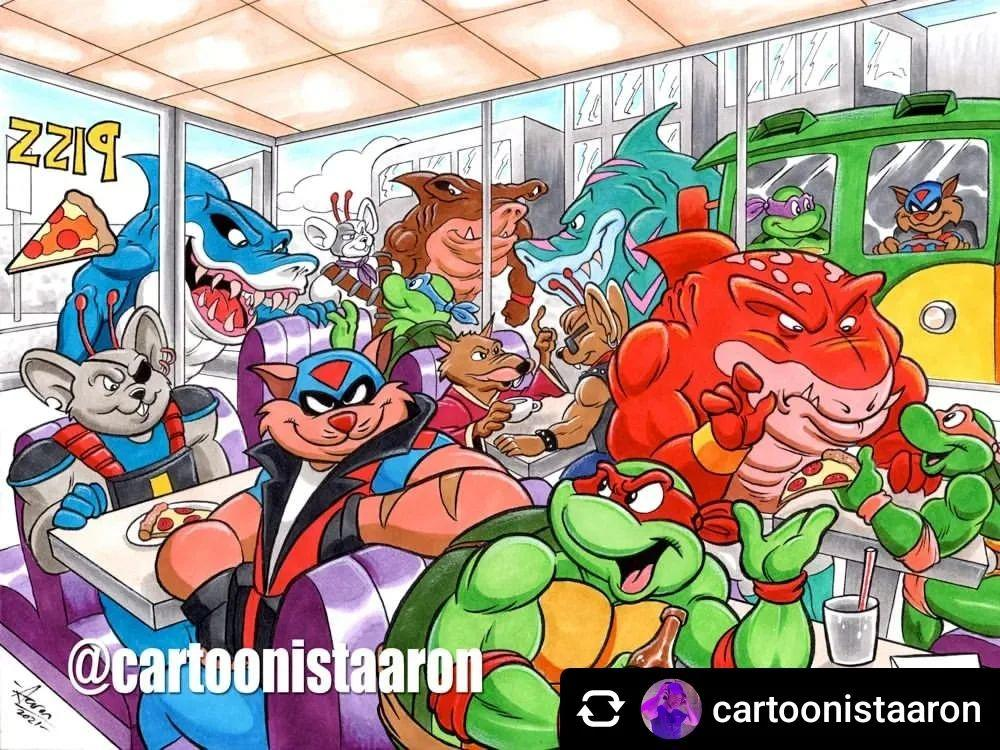

In [12]:
path_image= "data/gR0SFkT.jpeg"

Image(filename = path_image, width=500, height=500)

In [13]:
from PIL import Image, ImageFilter, ImageEnhance, ImageOps

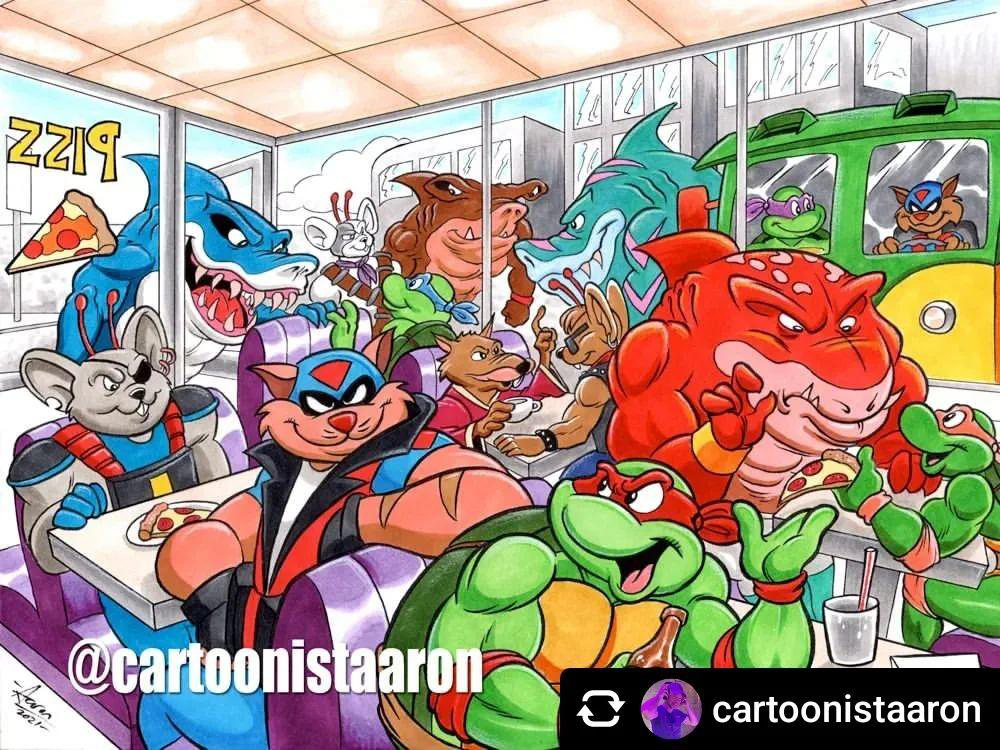

In [14]:
image = Image.open(path_image)
image

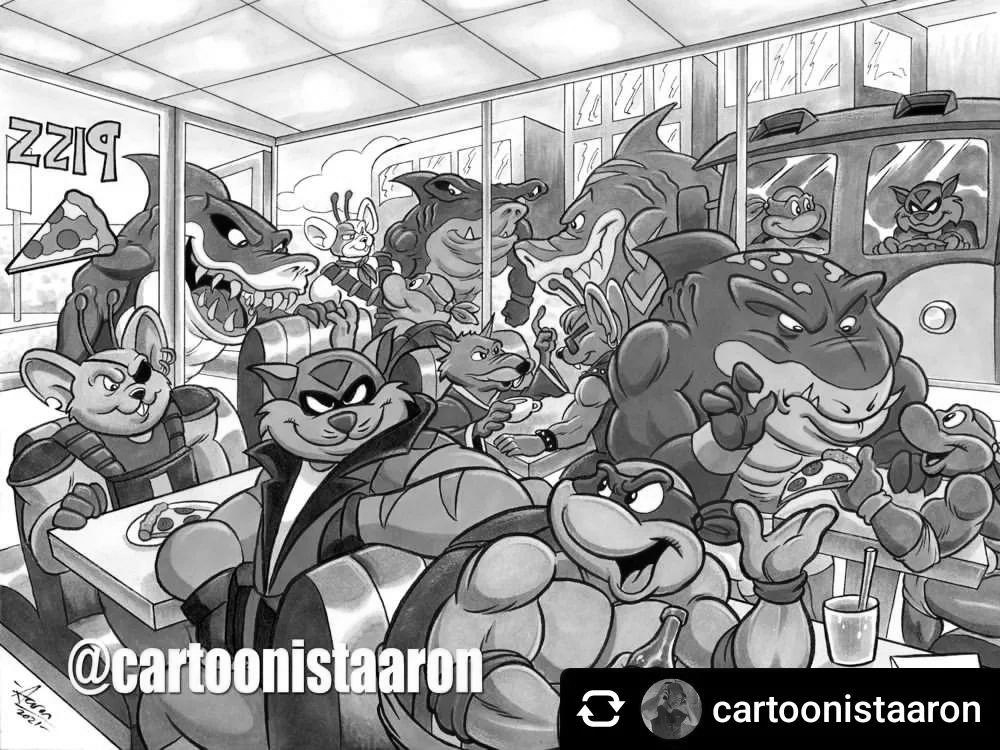

In [15]:
# Converting to Grayscale:
imagel = image.convert("L")
imagel

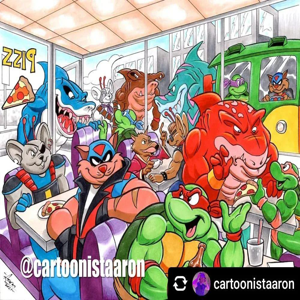

In [16]:
#Resizing an Image:
imager = image.resize((300, 300))
imager

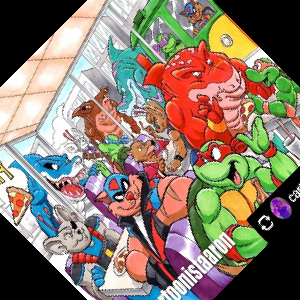

In [17]:
#Rotating an Image:
imager = imager.rotate(45)
imager

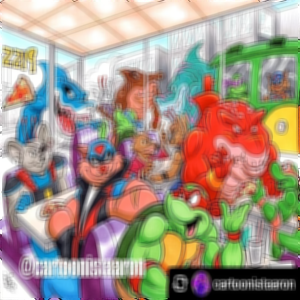

In [18]:
#Applying a Filter:
imager = image.resize((300, 300))
imager = imager.filter(ImageFilter.BLUR)
imager

In [19]:
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance, ImageStat

(<matplotlib.image.AxesImage at 0x230513d9c10>,
 Text(0.5, 1.0, 'ImageEnhance.Brightness(1.50)'))

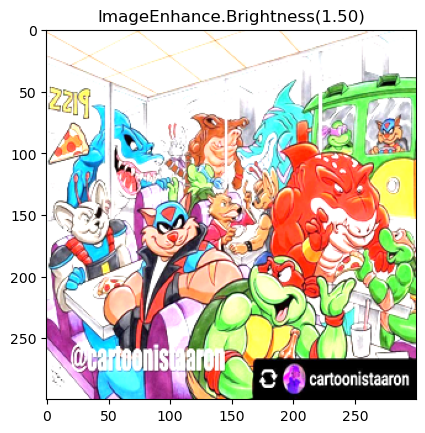

In [20]:
# Adjusting Brightness:
imager = image.resize((300, 300))
enhancer = ImageEnhance.Brightness(imager)
enhancer.enhance(1.5)
plt.imshow(enhancer.enhance(1.5)), plt.title('ImageEnhance.Brightness(1.50)')

(<matplotlib.image.AxesImage at 0x23051bebd90>,
 Text(0.5, 1.0, 'ImageEnhance.Sharpness(1.50)'))

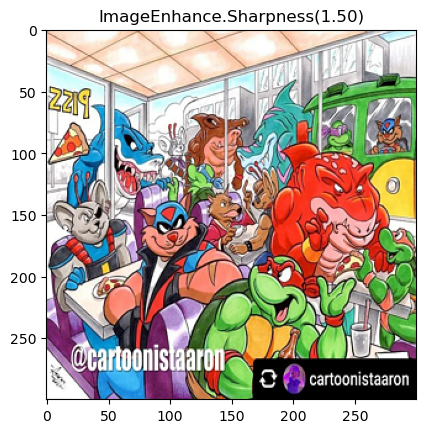

In [21]:
# Adjusting Sharpness:
imager = image.resize((300, 300))
enhancer = ImageEnhance.Sharpness(imager)
enhancer.enhance(1.5)
plt.imshow(enhancer.enhance(1.5)), plt.title('ImageEnhance.Sharpness(1.50)')